In [120]:
#Environment - Google Colab

In [121]:
#It took about 150 seconds to run this notebook

#In case layer brings an error, please run from the beginning again because the layer platform sometimes require a constant internet connection

In [122]:


# Import time module
import time
 
# record start time
start = time.time()

importing libraries

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error


In [124]:
!pip install -U layer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [125]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [126]:
import plotly.express as px

In [127]:
import layer

In [128]:
from layer.decorators import dataset,model, pip_requirements

In [129]:
layer.login()

In [130]:
layer.init("quality")

Your Layer project is here: https://app.layer.ai/jaycobson/quality

setting the maximum number of rows and columns we can view when we call the dataframe

In [131]:
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',100)

importing datasets

In [132]:
# train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

sample_submission = layer.get_dataset("zindi/air-quality/datasets/sample_submission").to_pandas()
test = layer.get_dataset("zindi/air-quality/datasets/test").to_pandas()
train = layer.get_dataset("zindi/air-quality/datasets/train").to_pandas()

Output()

Output()

Output()

In [133]:
train.groupby('device')['date'].min().sort_values().head(10)

device
aq_30    2019-03-14
aq_41    2019-04-10
aq_45    2019-05-23
aq_47    2019-08-22
aq_43    2019-08-22
aq_49    2019-08-29
aq_46    2019-08-29
aq_29    2019-08-29
aq_31    2019-08-29
aq_36    2019-08-29
Name: date, dtype: object

This shows that the readings did not start from the same dates

In [134]:
train.groupby('device')['date'].max().sort_values().head(10)

device
aq_56       2020-08-12
A0WN66FH    2020-08-19
aq_70       2020-08-19
aq_61       2020-08-19
aq_60       2020-08-19
aq_59       2020-08-19
aq_54       2020-08-19
aq_52       2020-08-19
aq_49       2020-08-19
aq_47       2020-08-19
Name: date, dtype: object

In [135]:
train.duplicated().any()

False

In [136]:
print(f'We have {train.shape[0]} rows and {train.shape[1]} columns in the train dataset')

We have 9923 rows and 71 columns in the train dataset


In [137]:
print(f'We have {test.shape[0]} rows and {test.shape[1]} columns in the test dataset')

We have 4254 rows and 70 columns in the test dataset


In [138]:
train.describe()

,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,pm2_5
count,9923.000000,9923.000000,9923.000000,9903.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,3005.000000,5277.000000,5277.000000,5277.000000,5277.000000,5277.000000,5277.000000,5277.000000,5277.000000,9588.000000,9588.000000,9588.000000,9588.000000,9588.000000,9588.000000,9387.000000,9387.000000,9387.000000,9387.000000,9387.000000,9387.000000,9387.000000,9387.000000,9387.000000,8414.000000,8414.000000,8414.000000,8414.000000,8414.000000,8414.000000,8414.000000,8414.000000,8414.000000,8414.000000,8414.000000,9923.000000
mean,0.242512,32.472012,0.790819,21.571340,0.000025,0.791470,0.000014,0.146898,-17.585282,37.885657,-86.494908,28.039346,0.000005,0.034763,2704.027002,2327.034387,829629.138825,-14.788836,37.208915,-85.283969,28.004210,0.000054,0.000023,0.000031,0.000105,8669.070415,-1.650950,0.088217,829664.404582,-20.506437,36.694451,-83.369145,28.407511,0.000135,1.091564,0.000076,0.198037,28.061193,-86.658758,39.514011,-17.735841,-1.406605,829639.713116,-15.619594,40.117997,-86.777375,27.720097,0.115579,2.587584,0.303657,228.462771,0.454974,-17.495461,39.555149,-87.249497,27.856165,0.479757,50048.336811,6334.871458,56017.987582,5405.379477,17.943963,0.269046,-17.784138,40.689597,-86.994058,27.792085,57.107307
std,0.332311,0.545655,0.157910,4.060502,0.000299,0.197640,0.000207,0.085867,86.751706,19.323026,39.626550,6.474148,0.000088,0.006469,1118.013416,1392.642031,203.983721,83.050155,18.494191,39.856047,6.369894,0.000016,0.000017,0.000003,0.000020,828.532

In [139]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9923 entries, 0 to 9922
Data columns (total 71 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID                                                        9923 non-null   object 
 1   date                                                      9923 non-null   object 
 2   device                                                    9923 non-null   object 
 3   site_latitude                                             9923 non-null   float64
 4   site_longitude                                            9923 non-null   float64
 5   humidity                                                  9923 non-null   float64
 6   temp_mean                                                 9903 non-null   float64
 7   SulphurDioxide_SO2_column_number_density                  4291 non-null   float64
 8   SulphurDioxide_SO2

It looks like we have a huge amount of null values or missing values. Lets find out how much they are

In [140]:
train.isna().sum()

ID                                                             0
date                                                           0
device                                                         0
site_latitude                                                  0
site_longitude                                                 0
humidity                                                       0
temp_mean                                                     20
SulphurDioxide_SO2_column_number_density                    5632
SulphurDioxide_SO2_column_number_density_amf                5632
SulphurDioxide_SO2_slant_column_number_density              5632
SulphurDioxide_cloud_fraction                               5632
SulphurDioxide_sensor_azimuth_angle                         5632
SulphurDioxide_sensor_zenith_angle                          5632
SulphurDioxide_solar_azimuth_angle                          5632
SulphurDioxide_solar_zenith_angle                           5632
SulphurDioxide_SO2_column

We can drop the missing values or interpolate to fill the missing values. Since this kind owner of this dataset might have missing values in the dataset in the future, it is advisable to use machine learning alorithms that can train on missing values such as LGBM Regressor, CatBoost, HistGradienBoosting Regressor or XGBoost

In [141]:
test.isna().sum()

ID                                                             0
date                                                           0
device                                                         0
site_latitude                                                  0
site_longitude                                                 0
humidity                                                       0
temp_mean                                                      0
SulphurDioxide_SO2_column_number_density                    3340
SulphurDioxide_SO2_column_number_density_amf                3340
SulphurDioxide_SO2_slant_column_number_density              3340
SulphurDioxide_cloud_fraction                               3340
SulphurDioxide_sensor_azimuth_angle                         3340
SulphurDioxide_sensor_zenith_angle                          3340
SulphurDioxide_solar_azimuth_angle                          3340
SulphurDioxide_solar_zenith_angle                           3340
SulphurDioxide_SO2_column

The test dataset also has a large proportion of the dataset missing

In [142]:
train.duplicated().any()


#we dont have duplicated values in our train set

False

In [143]:
train.dtypes

ID                                                           object
date                                                         object
device                                                       object
site_latitude                                               float64
site_longitude                                              float64
humidity                                                    float64
temp_mean                                                   float64
SulphurDioxide_SO2_column_number_density                    float64
SulphurDioxide_SO2_column_number_density_amf                float64
SulphurDioxide_SO2_slant_column_number_density              float64
SulphurDioxide_cloud_fraction                               float64
SulphurDioxide_sensor_azimuth_angle                         float64
SulphurDioxide_sensor_zenith_angle                          float64
SulphurDioxide_solar_azimuth_angle                          float64
SulphurDioxide_solar_zenith_angle               

In [144]:
train['device'].value_counts().head()

aq_30    464
aq_41    453
aq_45    372
aq_43    359
aq_46    352
Name: device, dtype: int64

In [145]:
train['device'].value_counts().tail()

aq_74    204
aq_79    181
aq_57    161
aq_64    127
aq_76    114
Name: device, dtype: int64

Obviously, some sensors have more readings than the other. This might be because some sensors were installed at later dates

Let's visualize the location of the sensors. We could do better if we had a map containing the geometry

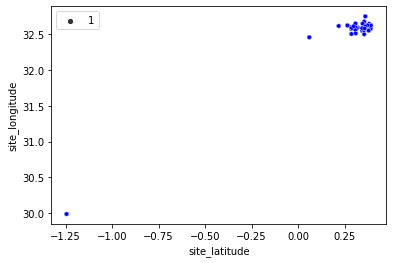

In [146]:
# plt.set_style('bmh')
sns.scatterplot(data = train,x = 'site_latitude' ,y = 'site_longitude', size=1,color = 'blue');

The plot above shows that some sensors are close to each other. One major result of this would be a difference in the temperature, humidity and other readings. Nevertheless, they are all within Uganda, so we should see a little difference in the pm 2.5 reading

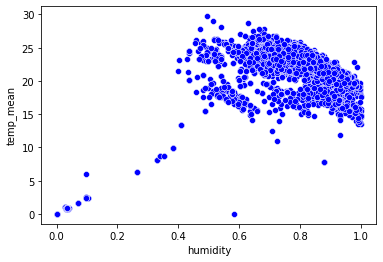

In [147]:
sns.scatterplot(x = 'humidity', y = 'temp_mean', data = train,color = 'blue');

This does not look realistic in Uganda. I do not think that Uganda's temperature can be lower and 15 and also have a humidity of 0. Uganda lies on the equator. The two seasons are wet and dry season. Unlike other countries where the temperature can be at 0 degrees, Uganda is different. 

Hence we might need to discard temperature and humidity or replace the unrealistic values so they do not pose as outliers or distort the machine learning model.

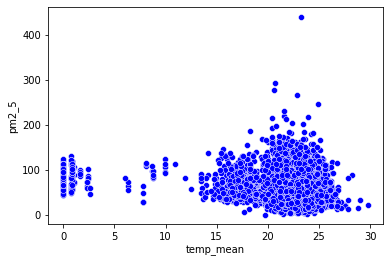

In [148]:
sns.scatterplot(y = 'pm2_5', x = 'temp_mean', data = train,color = 'blue')

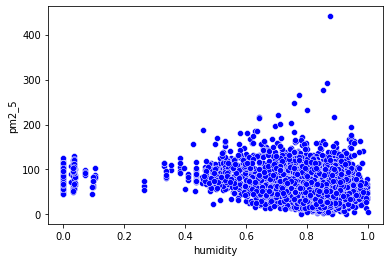

In [149]:
sns.scatterplot(y = 'pm2_5', x = 'humidity', data = train,color = 'blue')

In [150]:
train[(train['humidity']<0.4) & (train['temp_mean'] < 5)].sample(5)


,ID,date,device,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,pm2_5
7487,ID_4CNK8VXIA1,2020-06-04,ANQ16PZJ,0.353465,32.560322,0.000000,0.000000,0.000114,0.887318,0.000110,0.198765,-98.238619,53.190164,-51.489634,37.362568,0.000044,0.031753,2781.021729,2313.964111,829787.562500,-96.539391,53.456764,-51.521358,37.425198,0.000049,0.000012,0.000034,0.000118,8613.742719,-1.645316,0.168110,829819.871475,-98.238619,53.190164,-51.489634,37.362568,0.000176,1.376118,0.000183,0.198765,37.362568,-51.489634,53.190164,-98.238619,-1.645313,829819.871475,-98.238619,53.190164,-51.489634,37.362568,0.114983,2.866552,0.334977,231.920845,0.199283,-98.238619,53.190164,-51.489634,37.362568,0.209644,86918.807467,1321.751532,87863.144598,1194.843172,5.132957,0.283563,-98.237313,53.190296,-51.497777,37.355878,82.181250
8000,ID_I2TFQAWR14,2020-06-04,AR2RHV97,0.343729,32.551314,0.000000,0.000000,-0.000080,0.763746,-0.000061,0.158557,-98.243767,53.190315,-51.457901,37.388874,0.000090,0.032195,2398.087957,3015.273355,829787.562500,-96.592667,52.838939,-51.386734,37.311773,0.000037,0.000012,0.000034,0.000097,8613.743119,-1.333674,0.262294,829825.250000,-98.272223,52.895280,-51.392054,37.336061,-0.000084,1.310592,-0.000179,0.291272,37.336061,-51.392054,52.895280,-98.272223,-1.333672,829825.250000,-98.272223,52.895280,-51.392054,37.336061,0.116106,2.859130,0.337252,232.287888,0.290350,-98.272223,52.895280,-51.392054,37.336061,0.267201,80992.856934,1925.466725,87715.457925,1209.010603,4.364893,0.257472,-98.266948,52.949446,-51.404613,37.345367,70.575417
4609,ID_IWZCD6XELY,2020-06-22,ANQ16PZJ,0.353465,32.560322,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043081,2148.469558,2454.274890,829569.133746,70.863982,11.429641,-39.336373,30.508624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.7

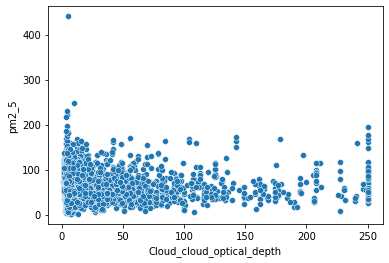

In [151]:
sns.scatterplot(x = 'Cloud_cloud_optical_depth', y = 'pm2_5', data = train);

#most of the features depict a nonlinear relationship with the pm2.5 reading

In [152]:
print(train['device'].nunique())
print('\n')
print(train['site_latitude'].nunique())
print('\n')
print(train['site_longitude'].nunique())

34


47


35


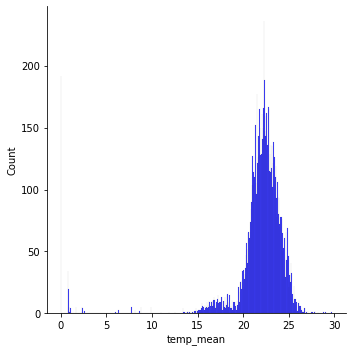

In [153]:
sns.displot(train['temp_mean'],bins = 500,color = 'blue');

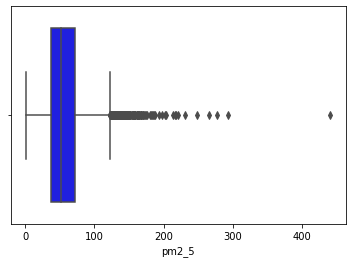

In [154]:
sns.boxplot(x = 'pm2_5', data = train,color = 'blue');

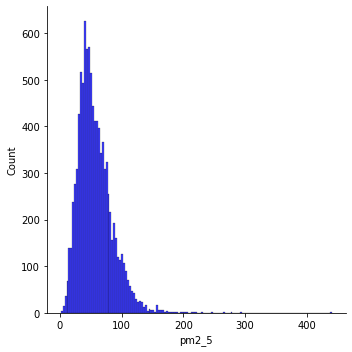

In [155]:
sns.displot(x = 'pm2_5', data = train,color = 'blue');

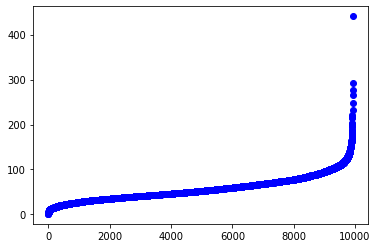

In [156]:
plt.scatter(range(train.shape[0]), np.sort(train['pm2_5'].values),color = 'blue');

Outlier suspected!
We should exclude that outlier from our dataset if its not reasonable

In [157]:
cols = ['SulphurDioxide_SO2_column_number_density',
 'SulphurDioxide_SO2_column_number_density_amf',
 'SulphurDioxide_SO2_slant_column_number_density',
 'SulphurDioxide_cloud_fraction', 'SulphurDioxide_SO2_column_number_density_15km',
 'CarbonMonoxide_CO_column_number_density',
 'CarbonMonoxide_H2O_column_number_density',
 'CarbonMonoxide_cloud_height', 'NitrogenDioxide_NO2_column_number_density',
 'NitrogenDioxide_tropospheric_NO2_column_number_density',
 'NitrogenDioxide_stratospheric_NO2_column_number_density',
 'NitrogenDioxide_NO2_slant_column_number_density',
 'NitrogenDioxide_tropopause_pressure',
 'NitrogenDioxide_absorbing_aerosol_index',
 'NitrogenDioxide_cloud_fraction',
 'NitrogenDioxide_sensor_altitude','Formaldehyde_tropospheric_HCHO_column_number_density',
 'Formaldehyde_tropospheric_HCHO_column_number_density_amf',
 'Formaldehyde_HCHO_slant_column_number_density',
 'Formaldehyde_cloud_fraction','UvAerosolIndex_absorbing_aerosol_index',
 'UvAerosolIndex_sensor_altitude', 'Ozone_O3_column_number_density',
 'Ozone_O3_column_number_density_amf',
 'Ozone_O3_slant_column_number_density',
 'Ozone_O3_effective_temperature',
 'Ozone_cloud_fraction','Cloud_cloud_fraction',
 'Cloud_cloud_top_pressure',
 'Cloud_cloud_top_height',
 'Cloud_cloud_base_pressure',
 'Cloud_cloud_base_height',
 'Cloud_cloud_optical_depth',
 'Cloud_surface_albedo']

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning

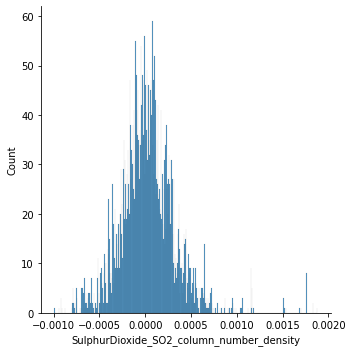

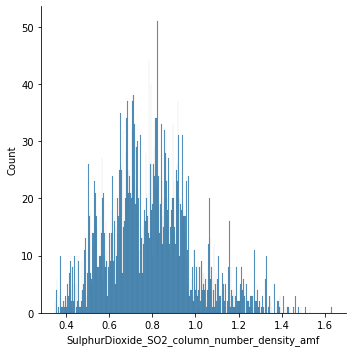

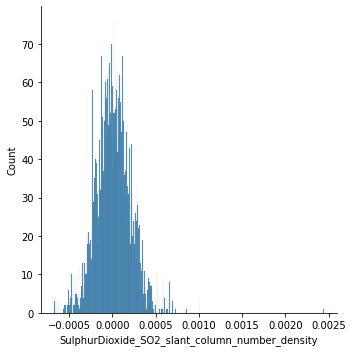

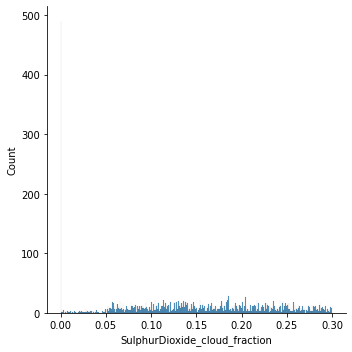

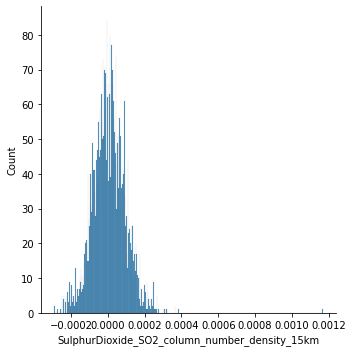

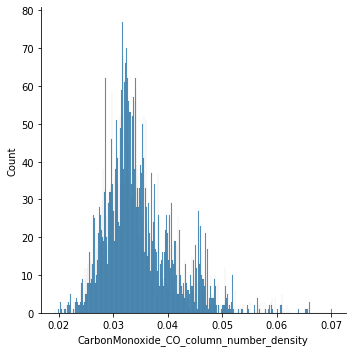

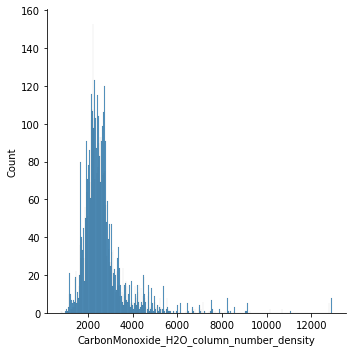

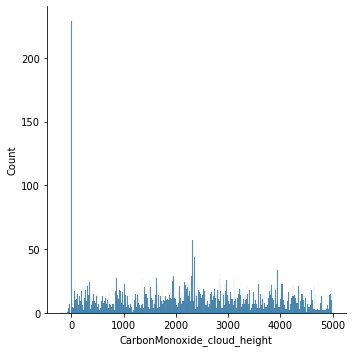

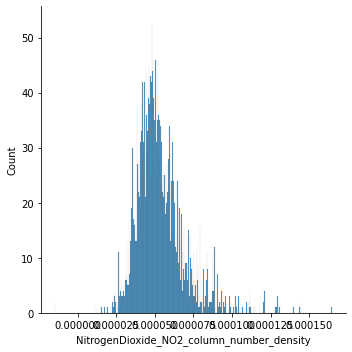

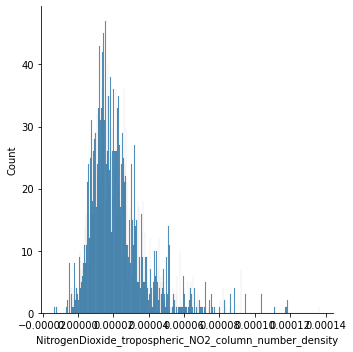

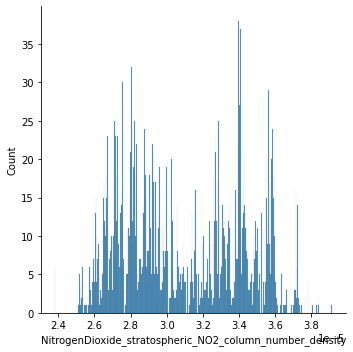

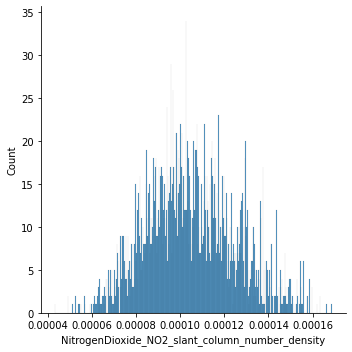

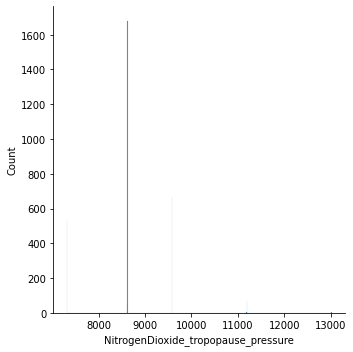

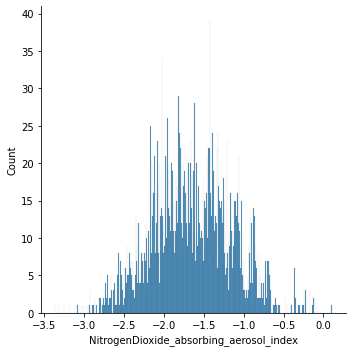

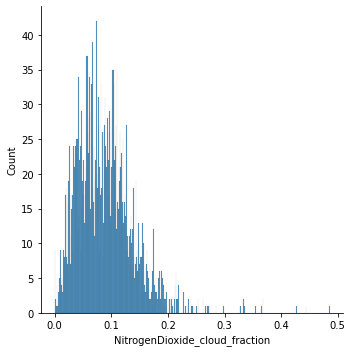

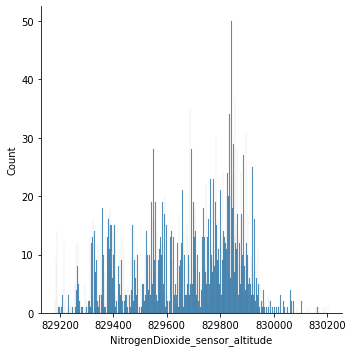

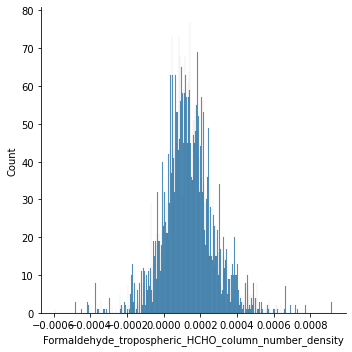

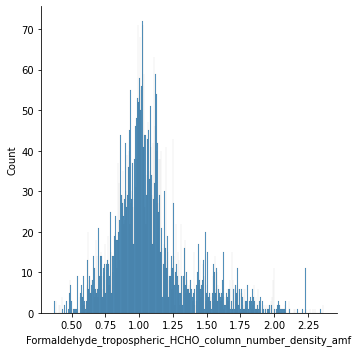

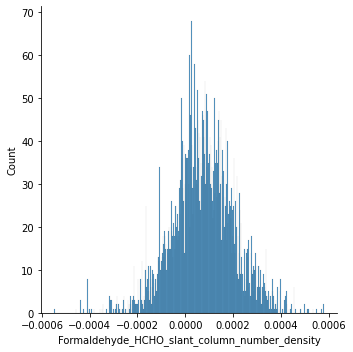

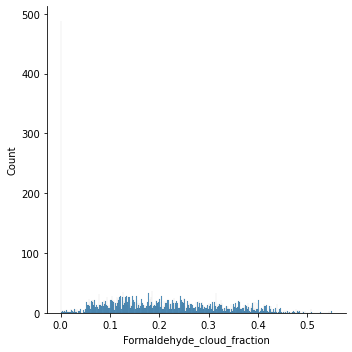

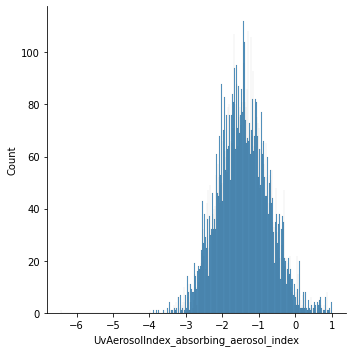

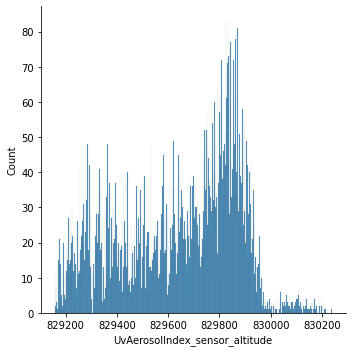

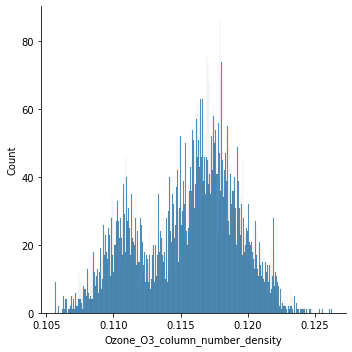

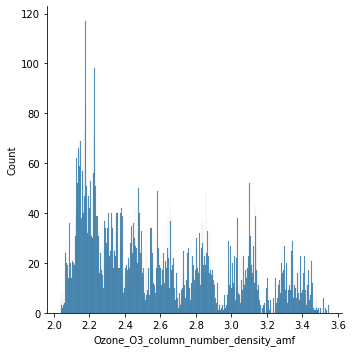

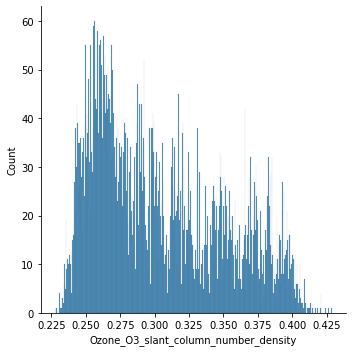

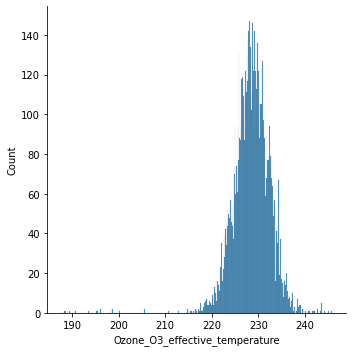

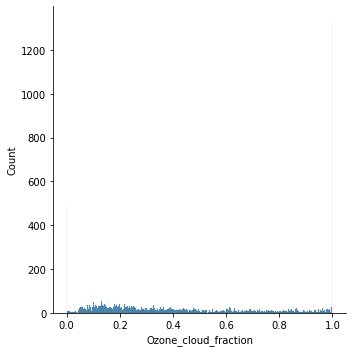

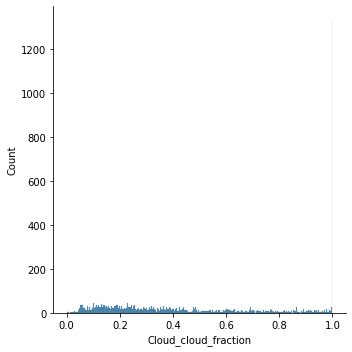

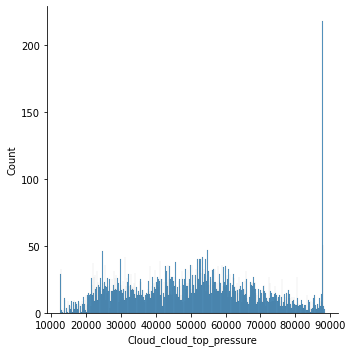

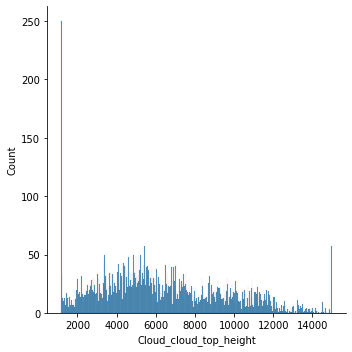

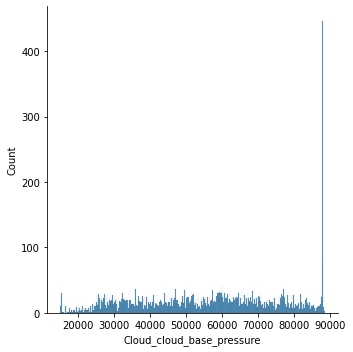

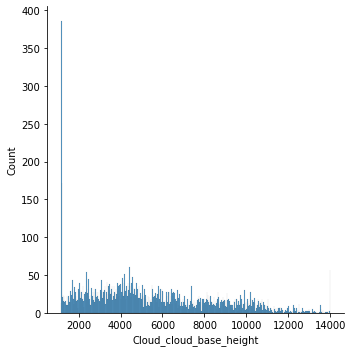

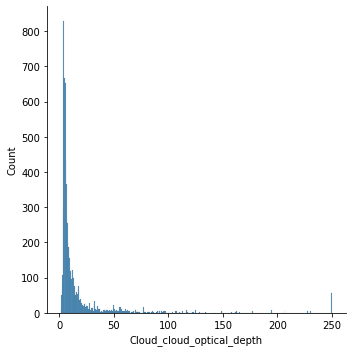

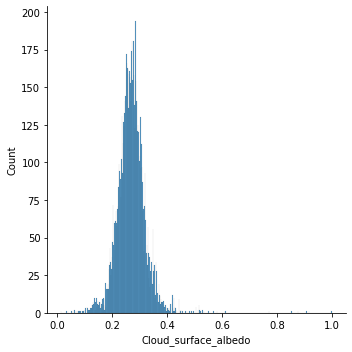

In [158]:
for col in cols:
    sns.displot(train[col], bins = 500)

Some features seem to have outliers, we might not be bothered about them because not all of them help prediction

A heatmap will show us the correlation amongst the features and the correlation between the features and the target variable ( pm 2.5)

We have data for 2019 and 2020. The data for 2019 started from march while the data for 2020 stopped at august

In [159]:
#creating date features


train['date'] = pd.to_datetime(train['date'])
train['Year'] = train['date'].dt.year
train['Month'] = train['date'].dt.month
train['Day'] = train['date'].dt.dayofyear
train['dayweek'] = train['date'].dt.dayofweek


test['date'] = pd.to_datetime(test['date'])
test['Year'] = test['date'].dt.year
test['Month'] = test['date'].dt.month
test['Day'] = test['date'].dt.dayofyear
test['dayweek'] = test['date'].dt.dayofweek


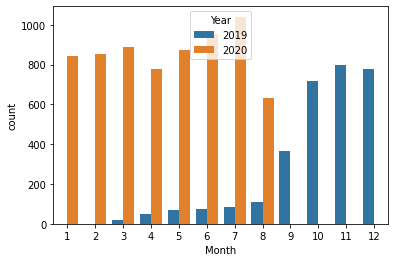

In [160]:
sns.countplot(x = 'Month', hue ='Year' , data = train);

The above figure shows that we had less records from the third month of 2019 to the ninth month of 2019

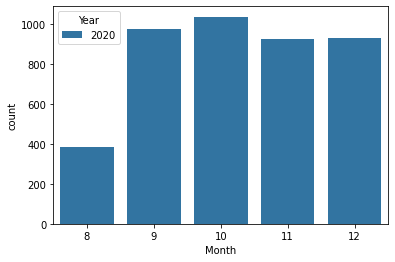

In [161]:
sns.countplot(x = 'Month', hue ='Year' , data = test);

So we are going to be making predictions for almost four and a half months

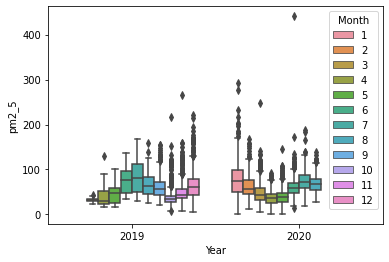

In [162]:
sns.boxplot(hue = 'Month', y = 'pm2_5', data = train, x = 'Year');

We had a very low pm2.5  reading in march 2019. This is misleading. I discovered that not all sensors had readings for that month. Instead it is better to visualize the mean across all months in the data

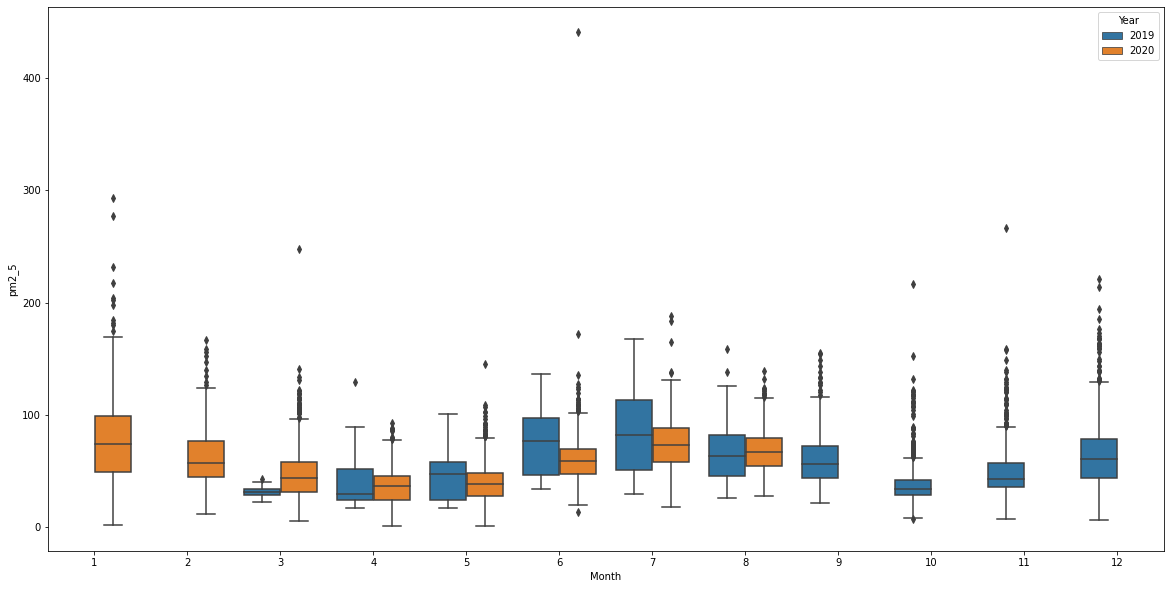

In [163]:
plt.figure(figsize = (20,10))
sns.boxplot(x = 'Month', y = 'pm2_5', data = train, hue = 'Year');

I believe there is a cyclical trend in this data. Observe January and December, they seem to have the highest pm2.5 reading while april and may are the lowest. This could be largely because of the rainfall. I generally observed that the pm2.5 reading was higher in the dry season and low in the wet season. Scientifically, dry season comes with wind which are carrier agents of the pm2_5 particles released into the atmosphere. 

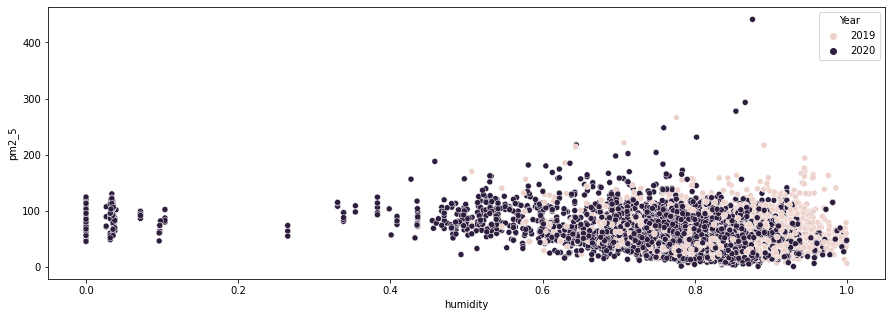

In [164]:
plt.figure(figsize = (15,5))
sns.scatterplot(x = 'humidity', y = 'pm2_5', data = train, hue = 'Year');

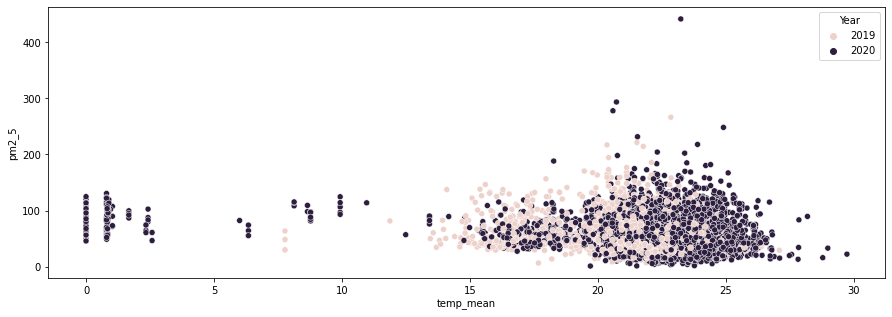

In [165]:
plt.figure(figsize = (15,5))
sns.scatterplot(x = 'temp_mean', y = 'pm2_5', data = train, hue ='Year');

The two plots above show an inverse relationship between temperature and humidity. The first plot shows us that humidity in 2020 has reduced than the way it was in 2019. Also, the second plot shows that, temperature has also increased in 2020. This is still an assumption until we ascertain when each device or sensor began operation.

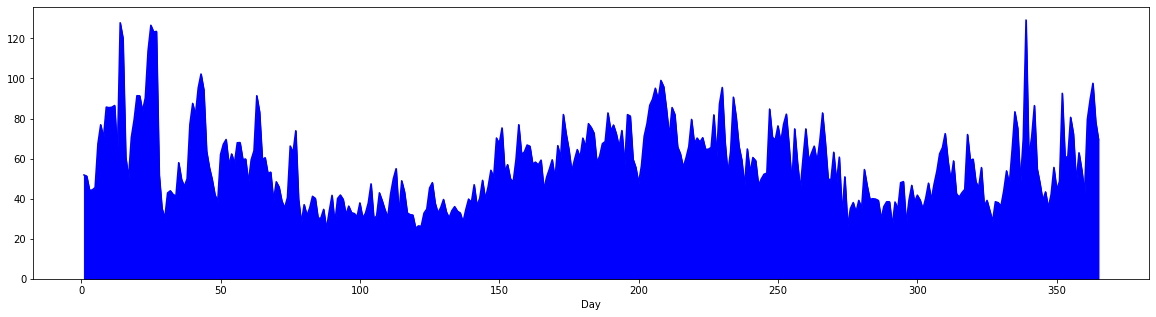

In [166]:
plt.figure(figsize = (20,5))
train.groupby('Day')['pm2_5'].mean().plot(kind = 'area',color = 'blue');

The plot above shows that there is a trend for each day across the year. I earlier mentioned that we have dry and wet seasons. The data has also captured the trend and we will create more features to ensure the trend is accounted for.

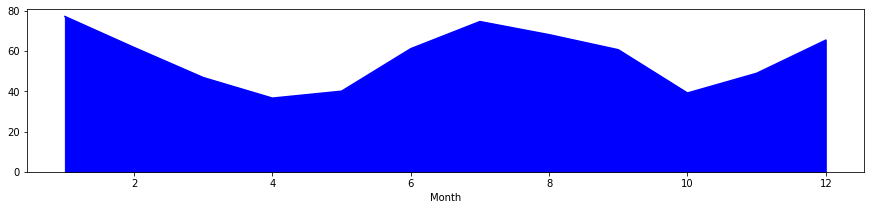

In [167]:
plt.figure(figsize = (15,3))
train.groupby('Month')['pm2_5'].mean().plot(kind = 'area', color = 'blue');

The plot above simplifies the previous visualization

Obviously, we can see that the start of the year usually starts with a high pm 2.5 reading then declines towards the third month and reaches a low in the fourth month, rises again in the fifth month and peaks in the seventh month, then declines again and reaches a low in the tenth month and rises again back to follow the usual trend.

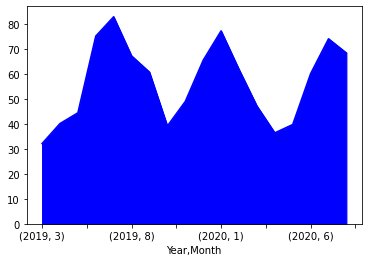

In [168]:
train.groupby(['Year','Month'])['pm2_5'].mean().plot(kind = 'area',color = 'blue');

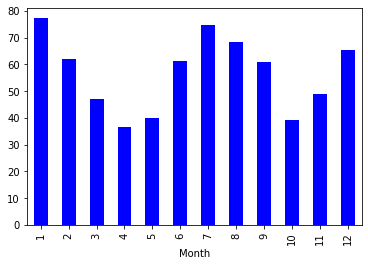

In [169]:
train.groupby('Month')['pm2_5'].mean().plot(kind = 'bar',color = 'blue');

Let's investigate one or two devices to see the common trend

In [170]:
aq29 = train[train['device'] == 'aq_29']

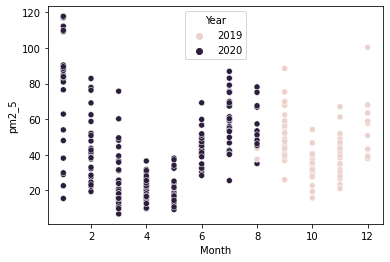

In [171]:
sns.scatterplot(data = aq29,x = 'Month' ,hue = 'Year',y = 'pm2_5');

Aq 29 sensor device follows the aforementioned trend too but it has many irregularities. Take a look at the first month, the lowest reading was about 18 while the hightest was 120. The range is too far. This might be because the weather changed so frequently or influence of domestic activities. Let's check if the trend in january here increased linearly.

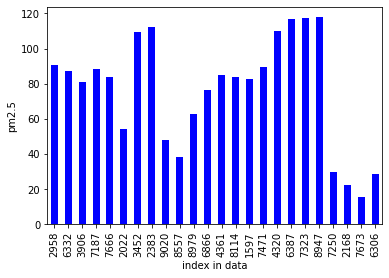

In [172]:
train[(train['device'] == 'aq_29') & (train['Month'] == 1)].sort_values(by = 'date')['pm2_5'].plot(kind = 'bar',color = 'blue')
plt.xlabel('index in data')
plt.ylabel('pm2.5');

How do we account for this sharp drop in the pm 2.5 reading for the last days of the month.

Let's see if the trend continues in the second month

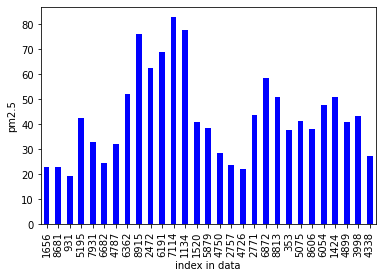

In [173]:
train[(train['device'] == 'aq_29') & (train['Month'] == 2)].sort_values(by = 'date')['pm2_5'].plot(kind = 'bar',color = 'blue')
plt.xlabel('index in data')
plt.ylabel('pm2.5');

Looks like the pm 2.5 trend continued for a few days in the early days of the second month. This simply shows that as much as we have a monthly trend, we might also have weekly trend and bi weekly trend. It might be difficult to model this because if we are predicting pm 2.5 reading with a lookout window of 5 months, we cannot have the previous readings. Regardless, we will add this to the model. Let's investigate further.

Since pm 2.5 reading has to do with pollution. I suspect that it might be higher on busy days where everyone is on the road and companies are in production. Let's probe further.

<BarContainer object of 24 artists>

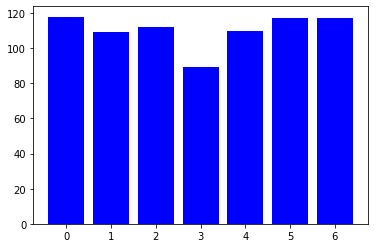

In [174]:
tt = train[(train['device'] == 'aq_29') & (train['Month'] == 1)].sort_values(by = 'date')
plt.bar(  tt['dayweek'], tt['pm2_5'],color = 'blue')

Ooops, i was wrong, pm 2.5 does not seem to be correlated with day of the week. So we can discard this feature from our features because, it will not help the model prediction

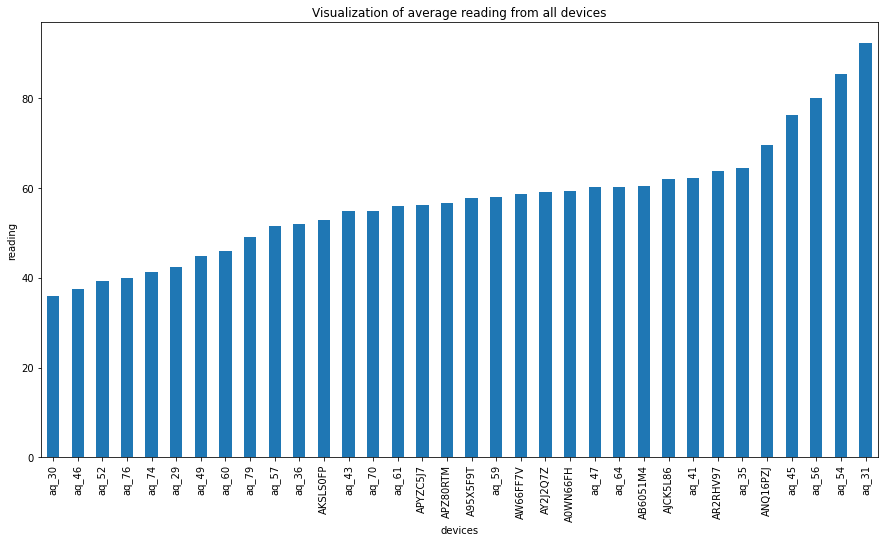

In [175]:
plt.figure(figsize=(15,8))
train.groupby('device')['pm2_5'].mean().sort_values().plot(kind = 'bar');
plt.title('Visualization of average reading from all devices')
plt.xlabel('devices')
plt.ylabel('reading');


In [176]:
#combining all the data available to create and drop features

In [177]:
alldata = pd.concat([train,test])

In [178]:
alldata = alldata.sort_values(['date','device'])


In [179]:
alldata = alldata.drop(['dayweek'], axis = 1)

In [180]:
alldata.shape

(14177, 74)

In [181]:
alldata.shape

(14177, 74)

In [182]:
alldata.sample(5)

,ID,date,device,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,pm2_5,Year,Month,Day
7210,ID_ROHO3Z2G4N,2020-05-02,AKSLS0FP,0.265007,32.625599,0.907080,20.783333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.589033,829258.625000,71.184784,66.022141,-35.027039,18.822302,0.113773,3.400121,0.393995,232.499542,0.786947,71.184784,66.022141,-35.027039,18.822302,0.787079,42441.972656,7090.934570,48368.050781,6090.934570,57.711262,0.317889,71.184769,66.021912,-35.027290,18.822330,33.311667,2020,5,123
3120,ID_27UOQQKO6B,2019-12-06,APYZC5J7,0.319970,32.595548,0.815667,23.086458,0.000047,1.059856,0.000050,0.130593,-98.873550,46.289303,-128.863159,38.058739,0.000021,0.041451,2790.997559,2842.299316,829874.187500,-97.110428,46.206470,-128.874451,38.041027,0.000078,0.000050,0.000028,0.000156,9580.205814,-1.691387,0.089899,829903.437500,-98.873550,46.289303,-128.863159,38.058739,0.000137,1.064483,0.000093,0.130593,38.058739,-128.863159,46.289303,-98.873550,-1.691397,829903.437500,-98.873550,46.289303,-128.863159,38.058739,0.110530,2.657274,0.297939,226.711624,0.131620,-98.873550,46.289303,-128.863159,38.058739,0.131671,87878.687500,1193.401611,87878.687500,1193.401611,5.492864,0.275690,-98.873558,46.289387,-128.863159,38.058754,63.398333,2019,12,340
3184,ID_TZBYF54KPC,2020-09-17,AB6051M4,0.390741,32.582257,0.802128,23.349653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032444,4791.691406,3989.090820,829273.062500,70.439514,57.699741,-83.533020,14.739717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000172,0.821071,0.000072,0.392554,14.766466,-83.687698,57.407692,72.120316,-2.347020,829299.875000,72.120316,57.407692,-83.687698,14.766466,0.119687,2.845931,0.347508,231.897263,0.394383,72.120316,57.407692,-83.687698,14.

In [183]:
def get_season(x):
    
    """To get season"""
    
    if x in [3,4,5,10,11]:
        return 0  # wet season
    elif x in [1,2,6,7,8,9,12]:
        return 1 # dry season

In [184]:
alldata['season'] = alldata['Month'].apply(lambda x :get_season(x))

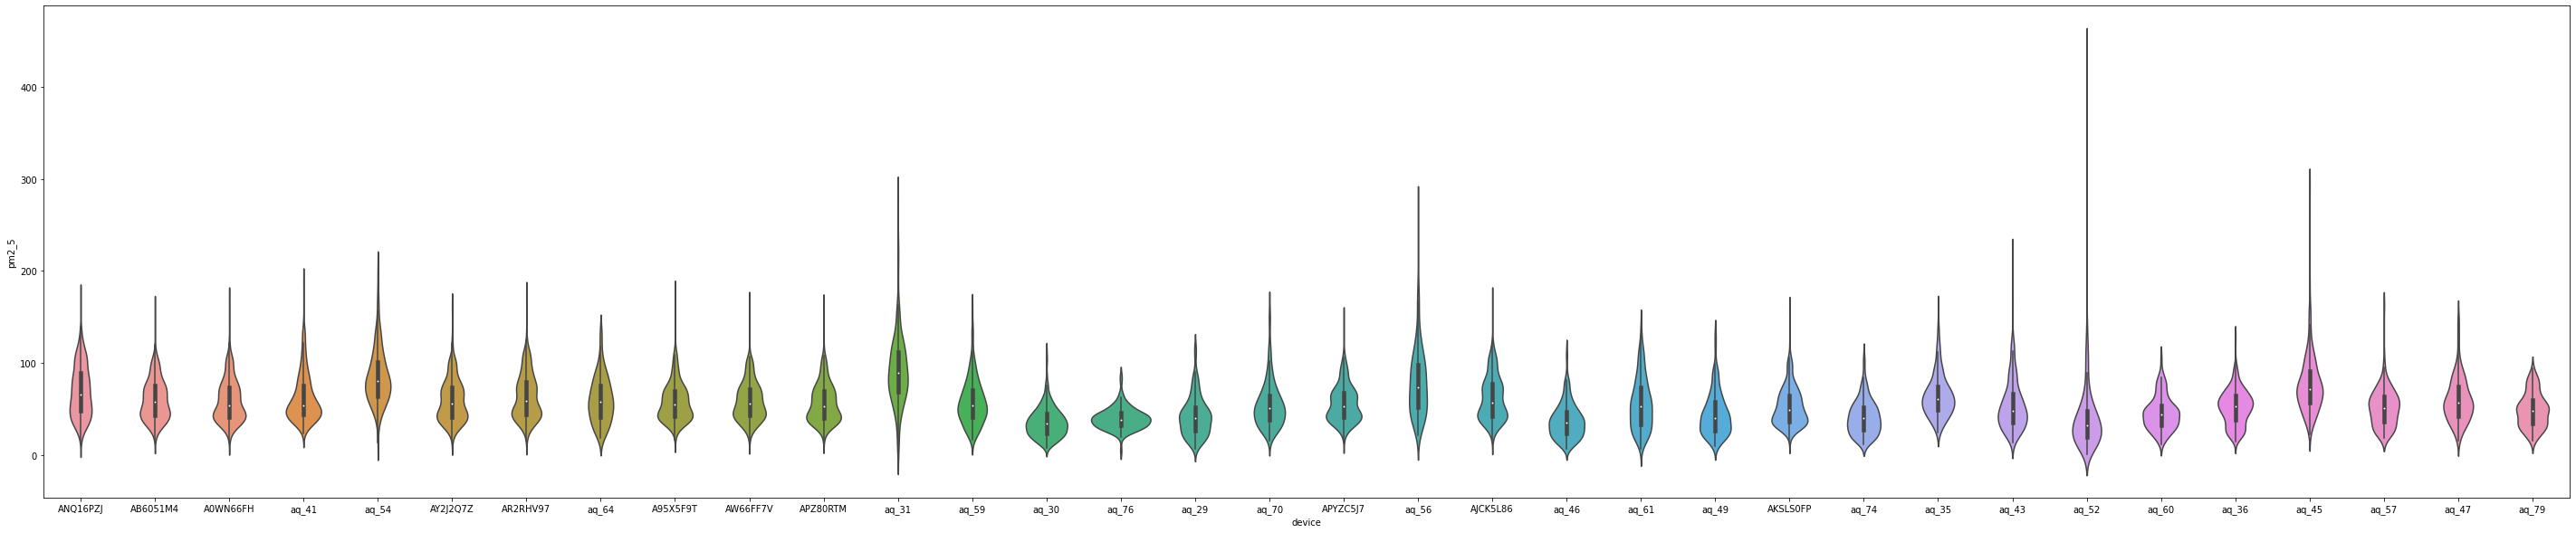

In [185]:
plt.figure(figsize = (50,10))
sns.violinplot(data = train, x = 'device', y = 'pm2_5');

In [186]:
fig = px.scatter_mapbox(
train, # Our DataFrame
lat='site_latitude',
lon='site_longitude',
width=600, # Width of map
height=600, # Height of map
# color= 'pm2_5',
hover_data=["device"],
# hover_name = "device"
)

fig.update_layout(mapbox_style="open-street-map")
fig.show()

The map above shows that we have some devices clustered within the same area. Let's explore more with a kmeans cluster before we move ahead

In [187]:
X = alldata.loc[:,['site_latitude' ,'site_longitude']]

In [188]:
X = X.drop_duplicates()

In [189]:
from sklearn.cluster import KMeans

In [190]:

from sklearn.metrics import silhouette_score
inertia = []
silhouette = []

for k in range(2,7):
    md = KMeans(n_clusters = k, random_state = 101)
    md.fit(X)
    inertia.append(md.inertia_)
    silhouette.append(silhouette_score(X, md.labels_))

In [191]:
inertia

[0.29852205964481493,
 0.20329774787271904,
 0.12691790962399643,
 0.07706866056671215,
 0.05335148330659374]

In [192]:
silhouette

[0.9707559525272613,
 0.7271449759282186,
 0.37954102223751457,
 0.4509644913027361,
 0.48316101619938906]

The optimum number of clusters is likely 3 but it does not give us much information

In [193]:
alldata = alldata.drop(['site_latitude' ,'site_longitude','humidity','temp_mean'], axis = 1)

In [194]:
alldata['device'].nunique()

36

In [195]:
alldata = alldata.set_index('date')

In [196]:
alldata = alldata.sort_values(by = ['date','device'],ascending = True)

In [197]:
def pm2_5_rollmean(dataframe, windows):
    
    """Creating rolling mean of reading for 4 days """
    
    dataframe = dataframe.copy()
    for window in windows:
        dataframe['pm2_5_roll_mean_' + str(window)] = dataframe.groupby(["device"])['pm2_5']. \
                                                          transform(lambda x: x.shift(1).rolling(window=window).mean())       
    return dataframe

In [198]:
alldata = pm2_5_rollmean(alldata, [4])

In [199]:
def lag_mean(dataframe, lags):
    
    """Creating a lag of 180 for the rolling mean of 4 days """
    
    dataframe = dataframe.copy()
    for lag in lags:
        dataframe['pm2_5_lagmean_' + str(lag)] = dataframe.groupby(["device"])['pm2_5_roll_mean_4'].transform(lambda x: x.shift(lag))        
    return dataframe

In [200]:
alldata = lag_mean(alldata, [180])

In [201]:
alldata = alldata.drop(['pm2_5_roll_mean_4'], axis = 1)

#It is important to drop this feature because while modelling it seemed to be the most important feature but sadly it is unknown when we have new data

In [202]:

def lag_features(dataframe, lags):
    
    """Creating lag of 45 and 165 """
    
    dataframe = dataframe.copy()
    for lag in lags:
        dataframe['pm2_5_' + str(lag)] = dataframe.groupby(["device"])['pm2_5'].transform(lambda x: x.shift(lag))        
    return dataframe

In [203]:
alldata = lag_features(alldata, [45,165])

In [204]:
def pm2_5(dataframe, windows):
    
    """Creating rolling mean of reading for 365 days """
    
    dataframe = dataframe.copy()
    for window in windows:
        dataframe['pm2_5_roll_mean_' + str(window)] = dataframe.groupby(["device"])['pm2_5']. \
                                                          transform(lambda x: x.shift(1).rolling(window=window, min_periods=1).mean())       
    return dataframe

In [205]:
alldata = pm2_5(alldata, [365])

In [206]:
def CO_densitylag(dataframe, lags):
    
    """Creating lag of CarbonMonoxide_CO_column_number_density """
    
    dataframe = dataframe.copy()
    for lag in lags:
        dataframe['CarbonMonoxide_CO_column_number_density_' + str(lag)] = dataframe.groupby(["device"])['CarbonMonoxide_CO_column_number_density'].transform(lambda x: x.shift(lag))        
    return dataframe


In [207]:
alldata = CO_densitylag(alldata, [180])

In [208]:
def NO2_densitylag(dataframe, lags):
    
    """Creating lag of NitrogenDioxide_NO2_column_number_density """
    
    dataframe = dataframe.copy()
    for lag in lags:
        dataframe['NitrogenDioxide_NO2_column_number_density_' + str(lag)] = dataframe.groupby(["device"])['NitrogenDioxide_NO2_column_number_density'].transform(lambda x: x.shift(lag))        
    return dataframe


In [209]:
alldata = NO2_densitylag(alldata, [180])

In [210]:
#dropping more columns to control overfitting and underfitting

alldata = alldata.drop(['Cloud_sensor_azimuth_angle',
 'Cloud_sensor_zenith_angle',
 'Cloud_solar_azimuth_angle',
 'Cloud_solar_zenith_angle', 'Formaldehyde_solar_zenith_angle',
 'Formaldehyde_solar_azimuth_angle',
 'Formaldehyde_sensor_zenith_angle',
 'Formaldehyde_sensor_azimuth_angle','NitrogenDioxide_sensor_azimuth_angle',
 'NitrogenDioxide_sensor_zenith_angle',
 'NitrogenDioxide_solar_azimuth_angle',
 'NitrogenDioxide_solar_zenith_angle','CarbonMonoxide_sensor_azimuth_angle',
 'CarbonMonoxide_sensor_zenith_angle',
 'CarbonMonoxide_solar_azimuth_angle',
 'CarbonMonoxide_solar_zenith_angle',
 
    ], axis = 1)

The angles are very similar so its reasonable to drop a few

In [211]:
alldata.isna().sum()

ID                                                              0
device                                                          0
SulphurDioxide_SO2_column_number_density                     8972
SulphurDioxide_SO2_column_number_density_amf                 8972
SulphurDioxide_SO2_slant_column_number_density               8972
SulphurDioxide_cloud_fraction                                8972
SulphurDioxide_sensor_azimuth_angle                          8972
SulphurDioxide_sensor_zenith_angle                           8972
SulphurDioxide_solar_azimuth_angle                           8972
SulphurDioxide_solar_zenith_angle                            8972
SulphurDioxide_SO2_column_number_density_15km                8972
CarbonMonoxide_CO_column_number_density                      6612
CarbonMonoxide_H2O_column_number_density                     6612
CarbonMonoxide_cloud_height                                  6612
CarbonMonoxide_sensor_altitude                               6612
NitrogenDi

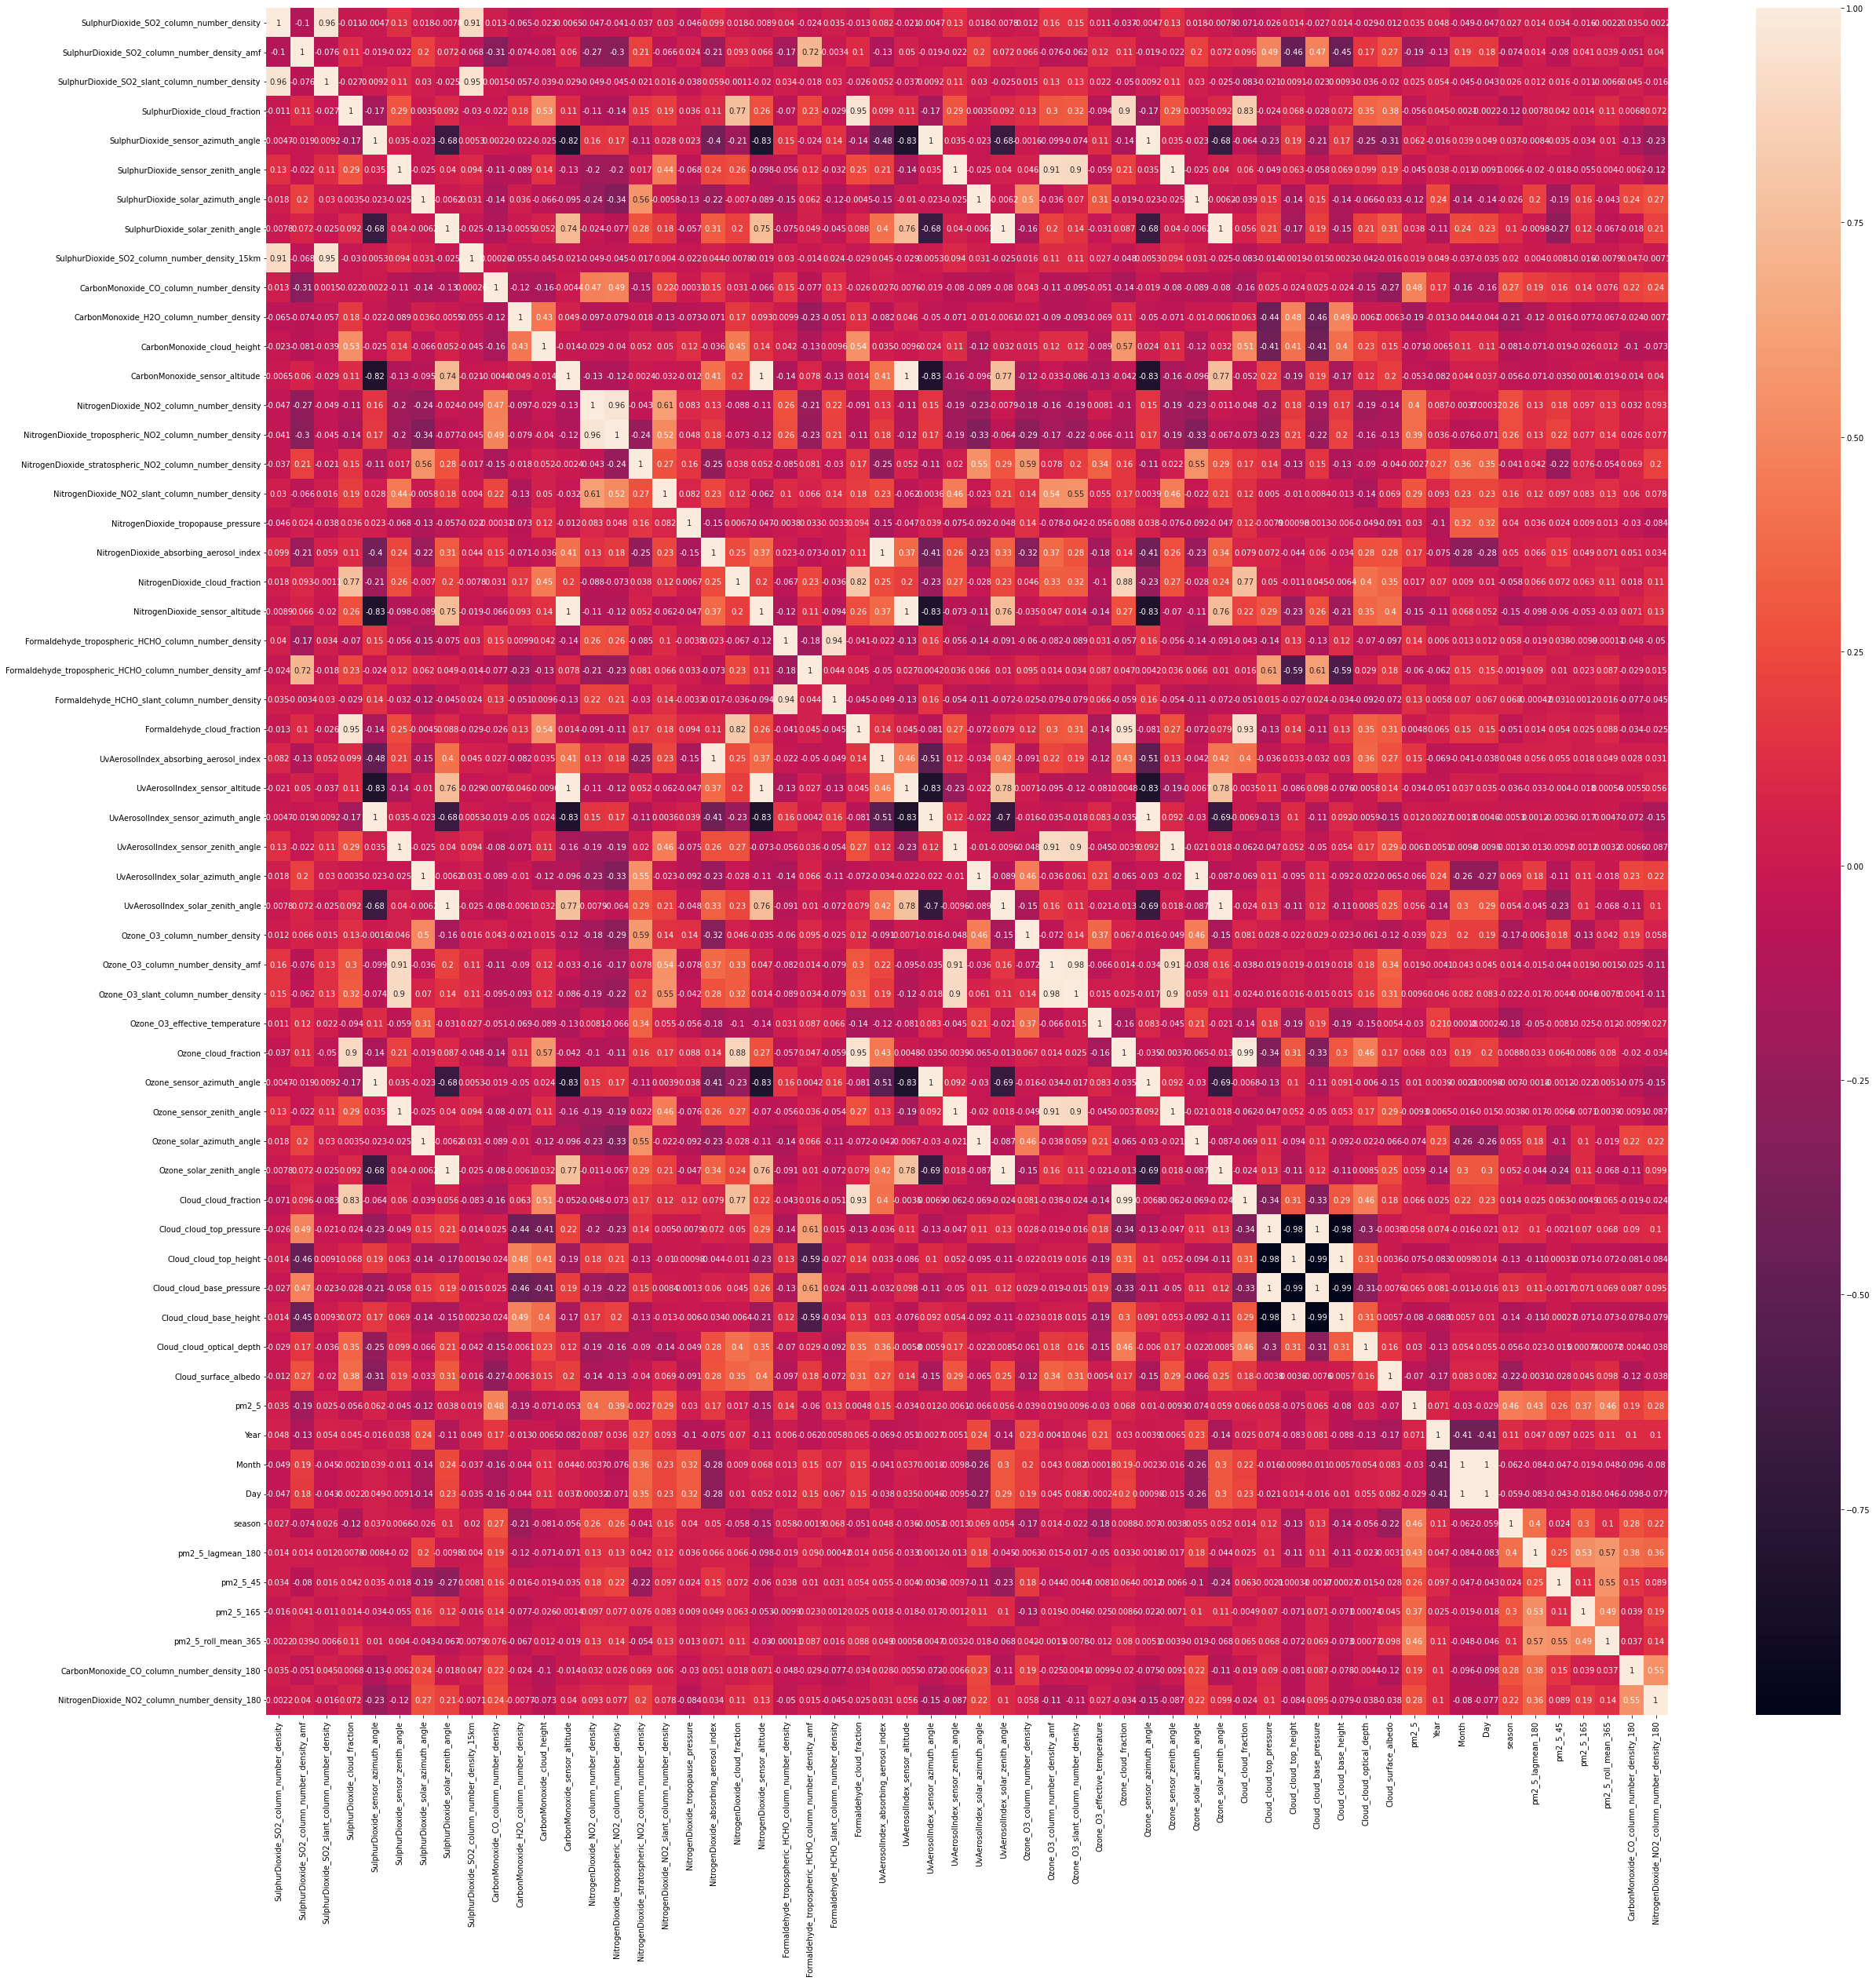

In [212]:
#Visualizing correlation via a heatmap

plt.figure(figsize = (40,40))
sns.heatmap(alldata.corr(), annot=True);

# MODELLING

In [213]:
le = LabelEncoder()

In [214]:
#encoding devices

alldata['device'] = le.fit_transform(alldata['device'])

In [215]:
#splitting train and test set

train = alldata.loc[~alldata.pm2_5.isna()]
test = alldata.loc[alldata.pm2_5.isna()]

In [216]:
#splitting the train into trainset and valset for cross validation 

trainset = train[train.index < '2020-07-10']
valset = train[train.index >= '2020-07-10']

In [217]:
print(f'The lenght of the validation data is {trainset.shape[0]}')
print(f'The lenght of the validation data is {valset.shape[0]}')

# vallen = valset.shape[0]

The lenght of the validation data is 8553
The lenght of the validation data is 1370


In [218]:
scale = StandardScaler()

In [219]:
x_train = trainset.drop(['ID','pm2_5'], axis = 1)
xcols = x_train.columns
y_train = trainset['pm2_5']
x_train = scale.fit_transform(x_train)

In [220]:
x_val = valset.drop(['ID','pm2_5'], axis = 1)
val_len = valset.shape[0]
y_val = valset['pm2_5']
x_val = scale.transform(x_val)

In [221]:
@model("modelforair")
@pip_requirements(packages=["catboost","seaborn"])
def train():
    from sklearn import metrics
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from catboost import CatBoostRegressor
    from sklearn.preprocessing import StandardScaler

    layer.log({'Validation amount' : val_len})

    y_train_mean = y_train.mean()
    y_train_pred = [y_train_mean] * len(y_train)
    train_mae_baseline = mean_absolute_error(y_train, y_train_pred)
    layer.log({"Baseline train mae:" : train_mae_baseline})

    y_val_mean = y_val.mean()
    y_val_pred = [y_val_mean] * len(y_val)
    validation_mae_baseline = mean_absolute_error(y_val, y_val_pred)
    layer.log({"Baseline validation mae:" : validation_mae_baseline})

    reg = CatBoostRegressor(iterations = 350,loss_function = 'MAE',eval_metric = 'MAE',verbose = False,random_state = 101)
    reg.fit(x_train,y_train)

    train_predictions = reg.predict(x_train)
    val_predictions = reg.predict(x_val)

    train_pred_mae = mean_absolute_error(y_train, train_predictions)
    val_pred_mae = mean_absolute_error(y_val, val_predictions)
    layer.log({'training mae' :  train_pred_mae })
    layer.log({'validation mae' :  val_pred_mae })

    layer.log({'true versus predicted' : sns.scatterplot(val_predictions,y_val)})
    plt.show()
  
    predictions_df = pd.DataFrame(val_predictions,columns=['Predicted pm2_5'])
    layer.log({"Sample predictions":predictions_df.sample(20)})

    importance = reg.feature_importances_
    importances_df = pd.DataFrame(importance, index=xcols, columns=['Importance'])
    importances_df = importances_df.sort_values(by='Importance', ascending=False)
    layer.log({"Feature importance": importances_df})
    layer.log({'Feature Importances' : sns.barplot(y=importances_df.head(20).index, x=importances_df['Importance'].head(20))})
    plt.show()

    return reg



In [222]:
layer.run([train])

Output()

RemoteRun(id=UUID('59ed91b7-8673-49f9-a951-5ec46bea04cc'))

In [223]:
my_model = layer.get_model("jaycobson/quality/models/modelforair").get_train()

Output()

In [224]:
testset = test.drop(['ID','pm2_5'], axis =1)

In [225]:
scaled_test = scale.transform(testset)

In [226]:
target  = my_model.predict(scaled_test)

In [227]:
target

array([83.72711765, 82.13398024, 78.37271406, ..., 49.61295578,
       50.81110473, 56.22394687])

In [228]:
test['result'] = target

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



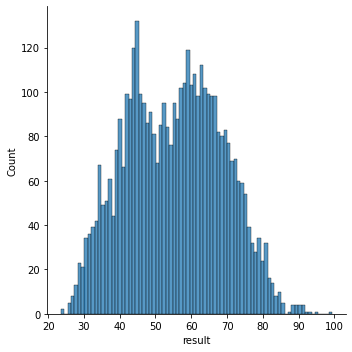

In [229]:
sns.displot(test['result'], bins = 80);

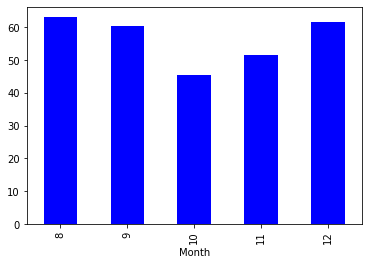

In [230]:
test.groupby('Month')['result'].mean().plot(kind = 'bar',color = 'blue');

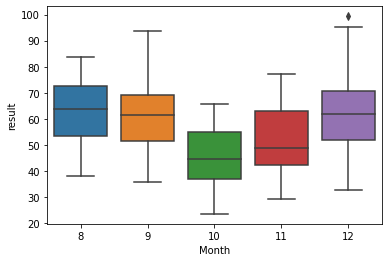

In [231]:
sns.boxplot(x = 'Month', y = 'result', data = test)

In [232]:
# From the figure above, we can see that october had the lowest reading which followed the pattern in the training data too

In [233]:
import pandas as pd
sub = pd.DataFrame(data=test["ID"], columns = ["ID"])
sub["pm2_5"] = target

In [234]:
sub[['ID','pm2_5']].to_csv('submission.csv',index = False)

In [235]:
sub

,ID,pm2_5
date,,
2020-08-20,ID_M1T3S50WVB,83.727118
2020-08-20,ID_S9OZLWWLTX,82.133980
2020-08-20,ID_OC21YTIKX2,78.372714
2020-08-20,ID_BNZBP8KDYD,78.604021
2020-08-20,ID_ZS2RAN8HZT,83.420327
...,...,...
2020-12-31,ID_HX4DNHA0G6,60.890692
2020-12-31,ID_V0N1JSMD4C,49.472144
2020-12-31,ID_Y7HLFD3N76,49.612956


In [236]:
sub["pm2_5"].mean()

55.332552509262875

In [237]:
end = time.time()

In [238]:
print("The time of execution of above program is :", (end-start), "s")

The time of execution of above program is : 156.93602681159973 s


##Recommendation


This model gave a leaderboard score of 3 but it could be better. 

I was able to achieve a score better than the model in this notebook.

If our model is going to be used by Airqo, i suggest that the number of estimators be reduced to 200 to reduce overfitting.

I also suggest that more features that describe the location should be given next time.

Thank you.